# MFAMIX - Biometrie

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Chargement des données
import pandas as pd
Biometrie2 = pd.read_csv("./data/Biometrie2.csv",sep=";",header=0,index_col=0)
Biometrie2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, A to F
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Longueur3classes  6 non-null      object
 1   Poids2classes     6 non-null      object
 2   Largeur3classes   6 non-null      object
 3   Longueur          6 non-null      int64 
 4   Poids             6 non-null      int64 
 5   Largeur           6 non-null      int64 
 6   Long3cl           6 non-null      object
 7   Poids2cl          6 non-null      object
 8   Larg3cl           6 non-null      object
 9   Long              6 non-null      int64 
 10  Poid              6 non-null      int64 
 11  Larg              6 non-null      int64 
dtypes: int64(6), object(6)
memory usage: 624.0+ bytes


In [3]:
from scientisttools import MFAMIX
res_mfamix = MFAMIX(n_components=None,group=[3,3,3,3],group_type=["n","s","n","s"],num_group_sup=[2,3],parallelize=True) #
# Instanciation
res_mfamix.fit(Biometrie2)

MFAMIX(group=[3, 3, 3, 3], group_type=['n', 's', 'n', 's'], n_components=None,
       num_group_sup=[2, 3], parallelize=True)

## Eigenvalue plots

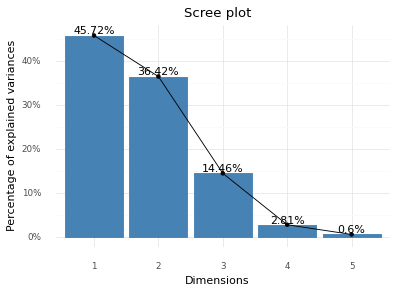

In [4]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(res_mfamix,add_labels=True)
print(p)

## Individuals Factor Map

### Color by RGB 

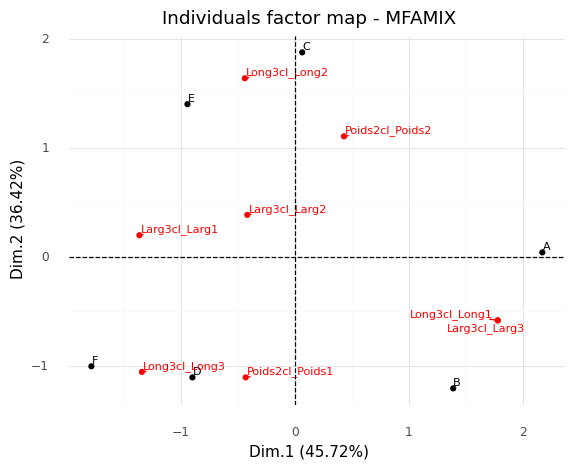

In [5]:
from scientisttools import fviz_mfa_ind
p = fviz_mfa_ind(res_mfamix,repel=True,ind_sup=False)
print(p)

### Color by cos2

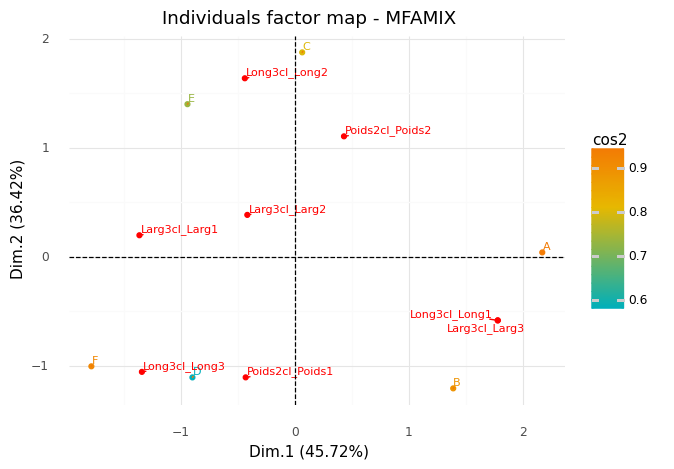

In [6]:
p = fviz_mfa_ind(res_mfamix,color="cos2",repel=True,ind_sup=False)
print(p)

### Color by contrib

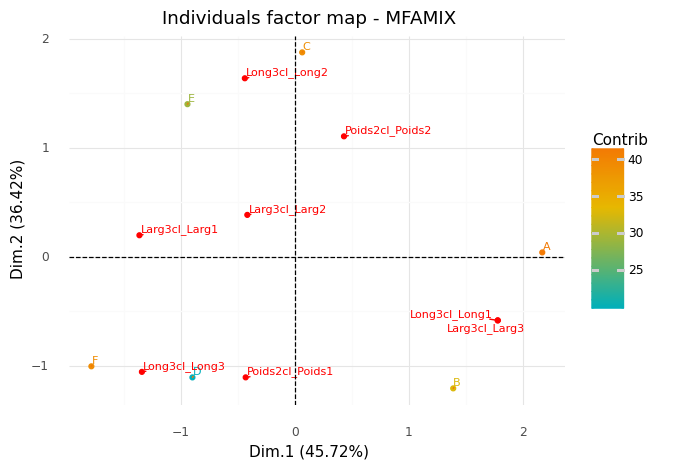

In [7]:
p = fviz_mfa_ind(res_mfamix,color="contrib",repel=True,ind_sup=False)
print(p)

### Color by active quantitatives variables

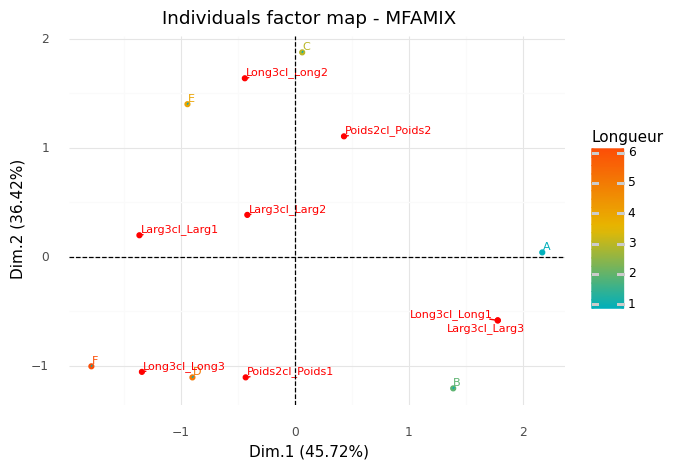

In [8]:
p = fviz_mfa_ind(res_mfamix,color="Longueur",repel=True,ind_sup=False)
print(p)

### Color by supplementary quantitatives variables

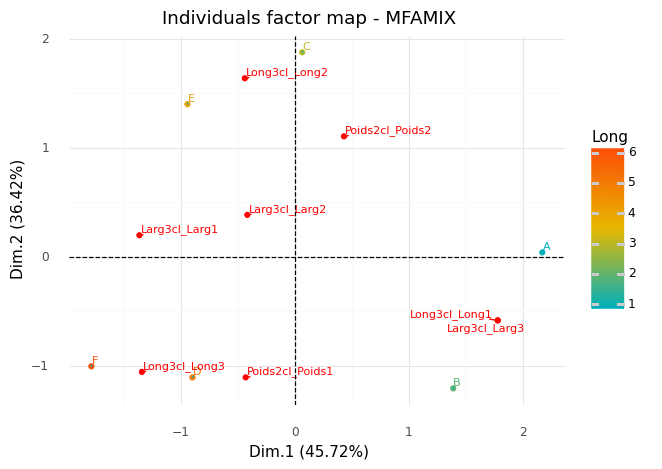

In [9]:
p = fviz_mfa_ind(res_mfamix,color="Long",repel=True,ind_sup=False)
print(p)

### Color by active qualitatives variables

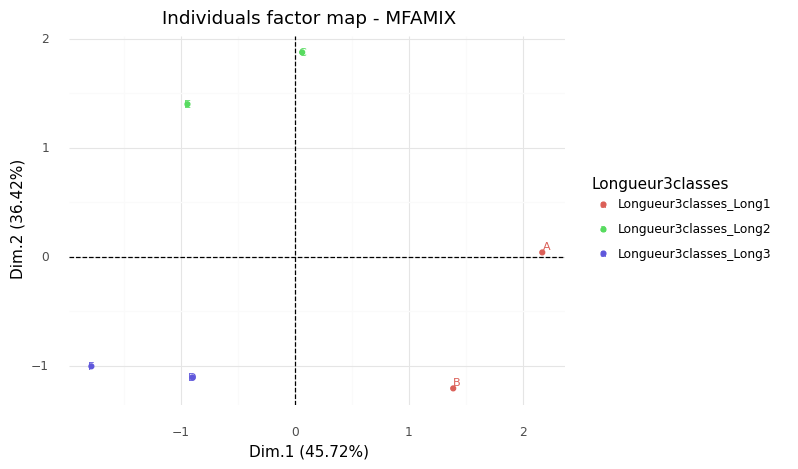

In [10]:
p = fviz_mfa_ind(res_mfamix,habillage="Longueur3classes",repel=True,ind_sup=False)
print(p)

### Color by supplementary qualitative variables

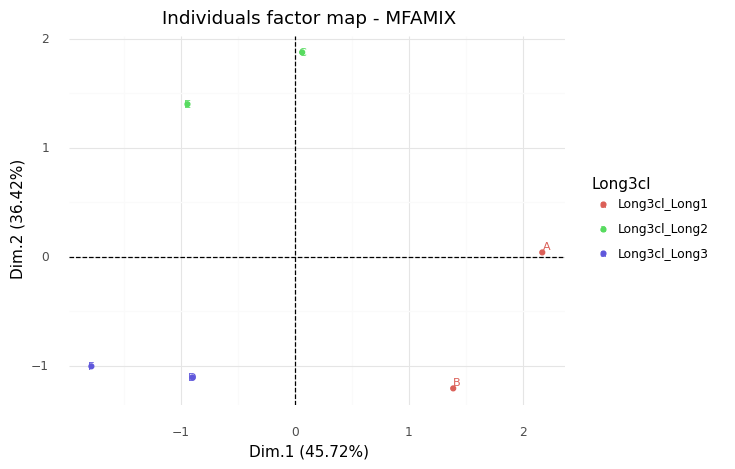

In [11]:
p = fviz_mfa_ind(res_mfamix,habillage="Long3cl",repel=True,ind_sup=False)
print(p)

### Color by numpy array

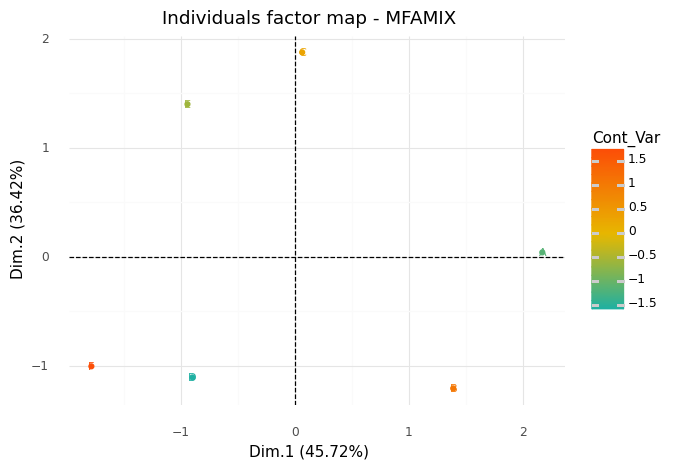

In [12]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfamix.ind_["coord"].shape[0])
p = fviz_mfa_ind(res_mfamix,color=color_numpy,quali_sup=False,ind_sup=False)
print(p)

### Color by kmeans

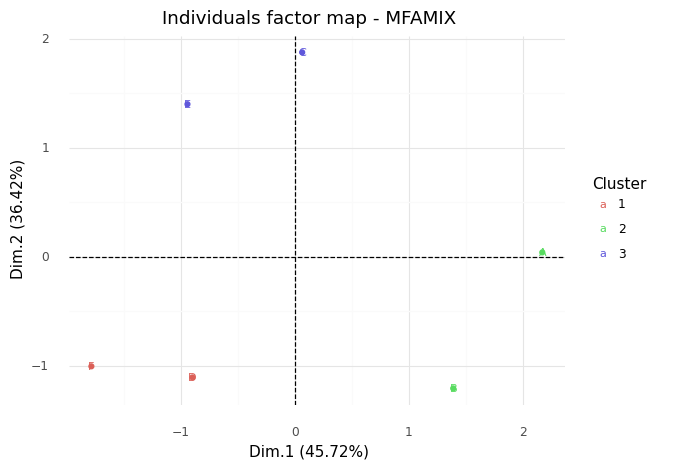

In [13]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfamix.ind_["coord"])
p = fviz_mfa_ind(res_mfamix,color=kmeans,repel=False,quali_sup=False,ind_sup=False)
print(p)

### Set limit

#### limit cos2

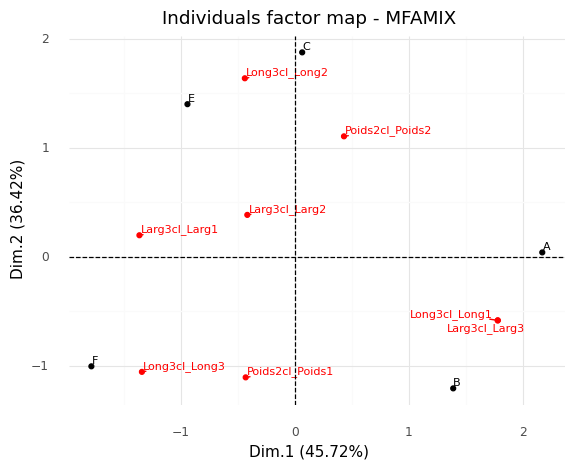

In [14]:
p = fviz_mfa_ind(res_mfamix,lim_cos2=0.6,repel=True,ind_sup=False)
print(p)

### limit contrib

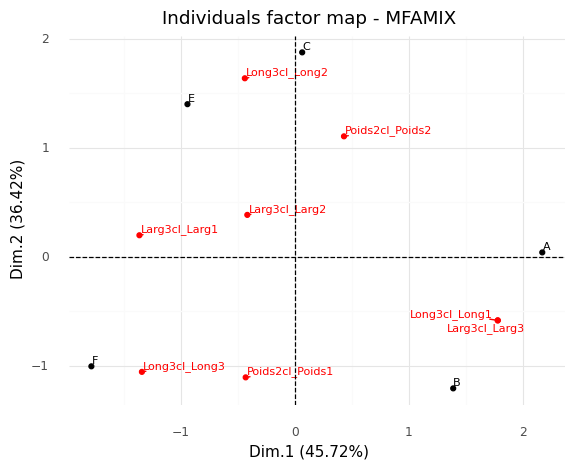

In [15]:
p = fviz_mfa_ind(res_mfamix,lim_contrib=25,repel=True,ind_sup=False)
print(p)

## Quantitaves variables factor map

### Color by RGB color

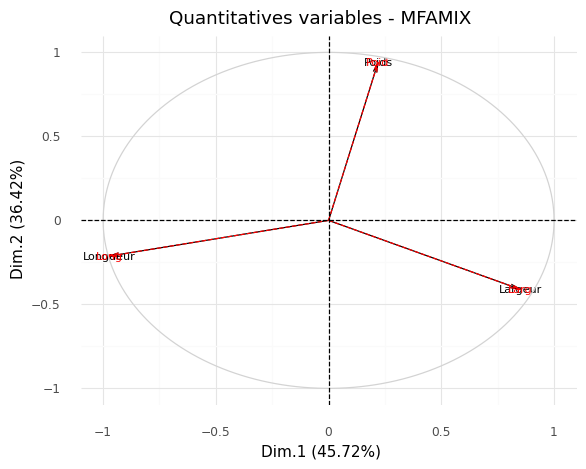

In [16]:
from scientisttools import fviz_mfa_var
p = fviz_mfa_var(res_mfamix,color="black")
print(p)

### Color by cos2

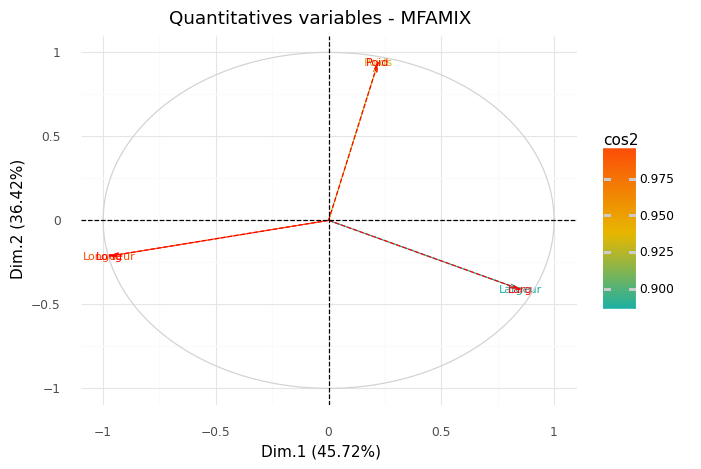

In [17]:
p = fviz_mfa_var(res_mfamix,color="cos2")
print(p)

### Color by contrib

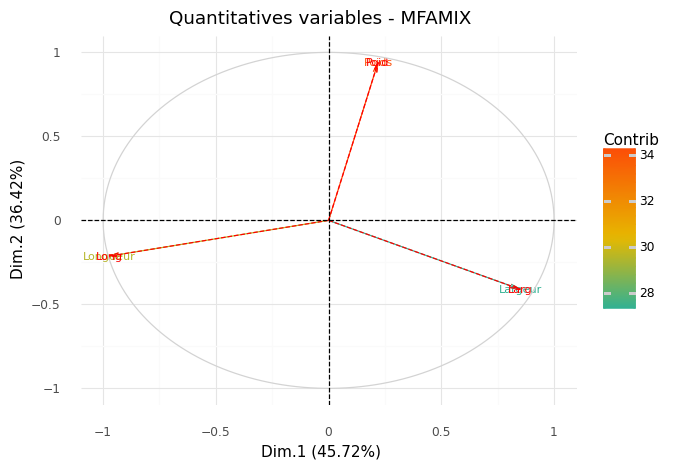

In [18]:
p = fviz_mfa_var(res_mfamix,color="contrib")
print(p)

### Colorby group

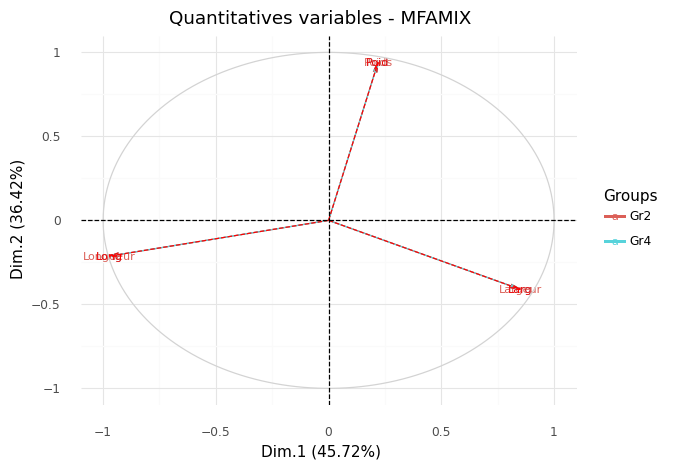

In [19]:
p = fviz_mfa_var(res_mfamix)
print(p)

### Color by numpy array

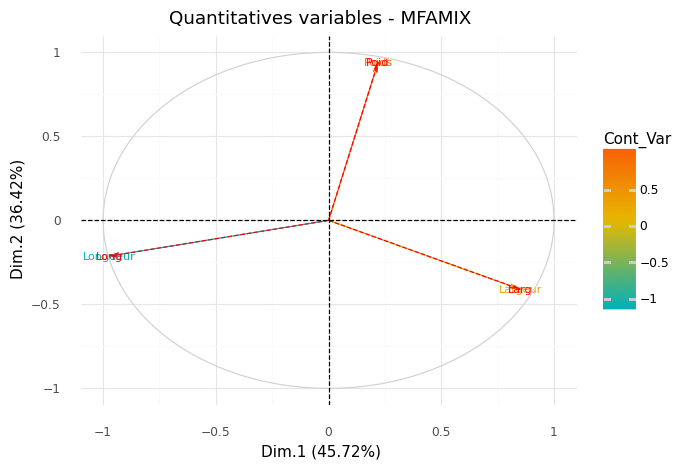

In [20]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfamix.quanti_var_["coord"].shape[0])
p = fviz_mfa_var(res_mfamix,color=color_numpy)
print(p)

### Color by kmeans

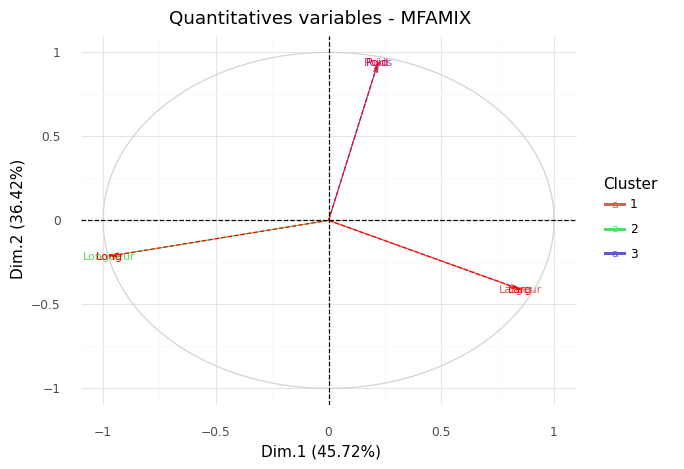

In [21]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfamix.quanti_var_["coord"])
p = fviz_mfa_var(res_mfamix,color=kmeans)
print(p)

## Set limit

### limit cos2

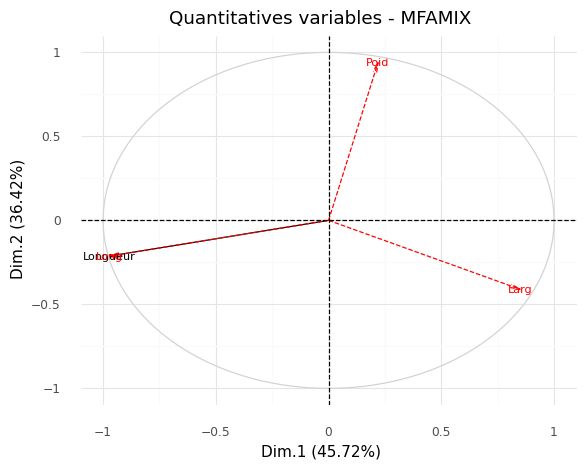

In [22]:
p = fviz_mfa_var(res_mfamix,color="black",lim_cos2=0.95)
print(p)

### limit contrib

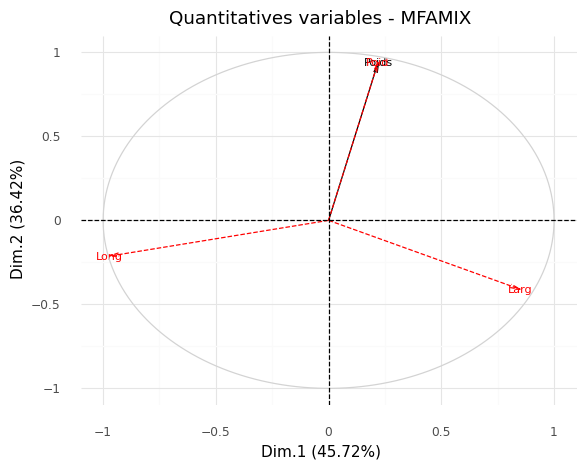

In [23]:
p = fviz_mfa_var(res_mfamix,color="black",lim_contrib=30)
print(p)

## Qualitatives variables categories Factor Map

### Color by RGB

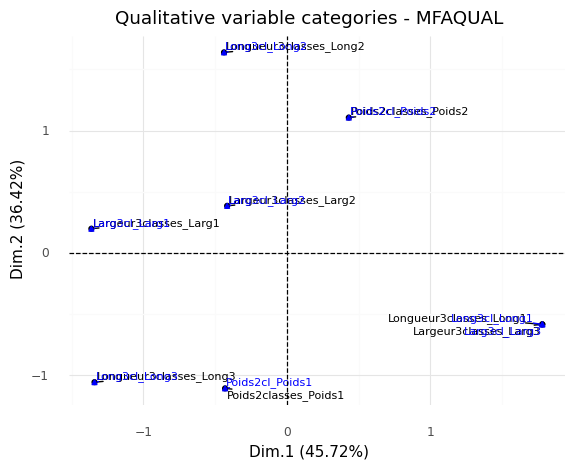

In [24]:
from scientisttools import fviz_mfa_mod
p = fviz_mfa_mod(res_mfamix,repel=True)
print(p)  

### Color by cos2

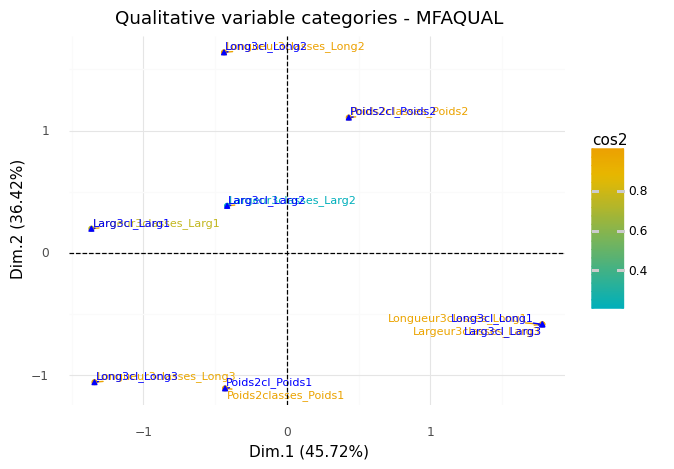

In [25]:
p = fviz_mfa_mod(res_mfamix,color="cos2",repel=True)
print(p) 

### Color by contrib

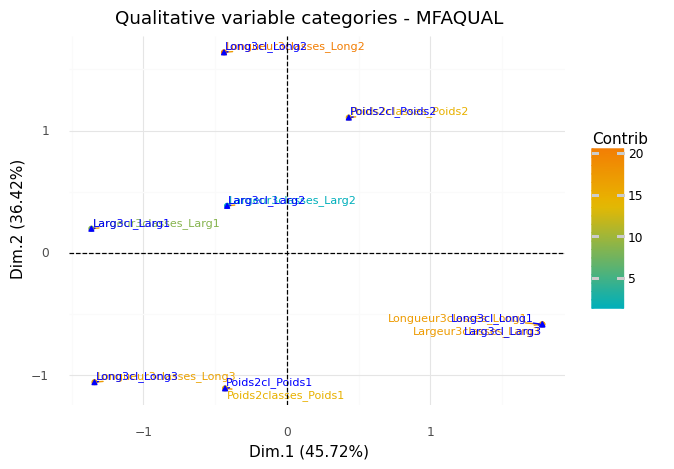

In [26]:
p = fviz_mfa_mod(res_mfamix,color="contrib",repel=True)
print(p) 

### Color by numpy array

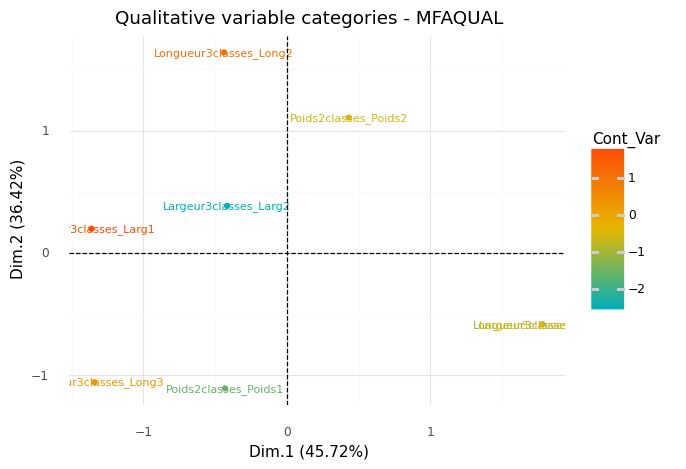

In [27]:
np.random.seed(123)
color_numpy = np.random.normal(size=res_mfamix.quali_var_["coord"].shape[0])
p = fviz_mfa_mod(res_mfamix,color=color_numpy,quali_sup=False)
print(p)

### Color by kmeans

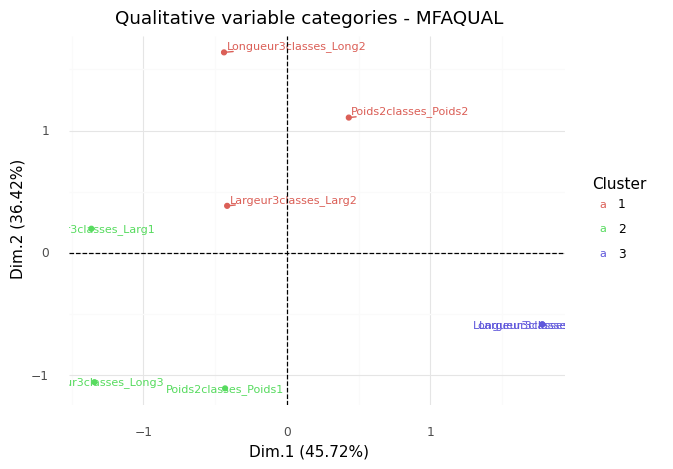

In [28]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(res_mfamix.quali_var_["coord"])
p = fviz_mfa_mod(res_mfamix,color=kmeans,repel=True,quali_sup=False)
print(p)

### Set limit

#### limit cos2

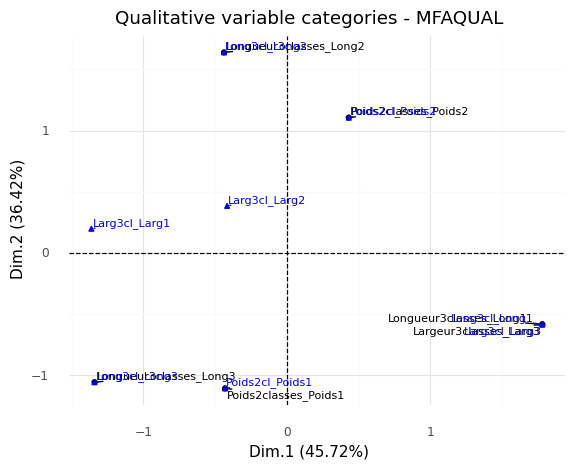

In [29]:
p = fviz_mfa_mod(res_mfamix,lim_cos2=0.8,repel=True)
print(p)

#### limit contrib

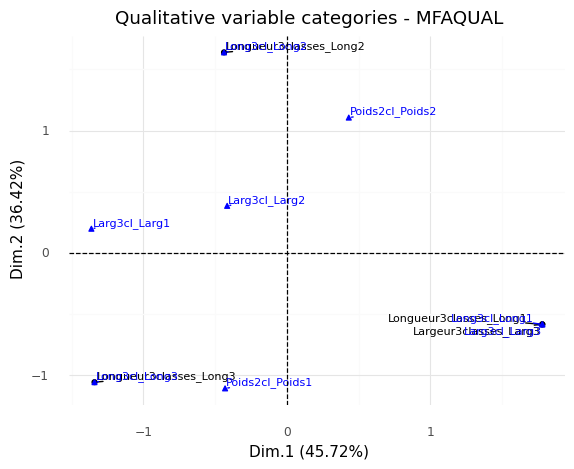

In [30]:
p = fviz_mfa_mod(res_mfamix,lim_contrib=15,repel=True)
print(p)

## Variable groups

### Color by RGB color

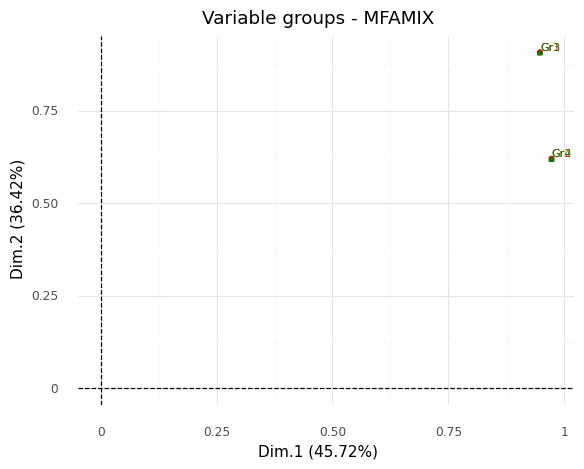

In [31]:
from scientisttools import fviz_mfa_group
p = fviz_mfa_group(res_mfamix,repel=True)
print(p)

## Partial axes

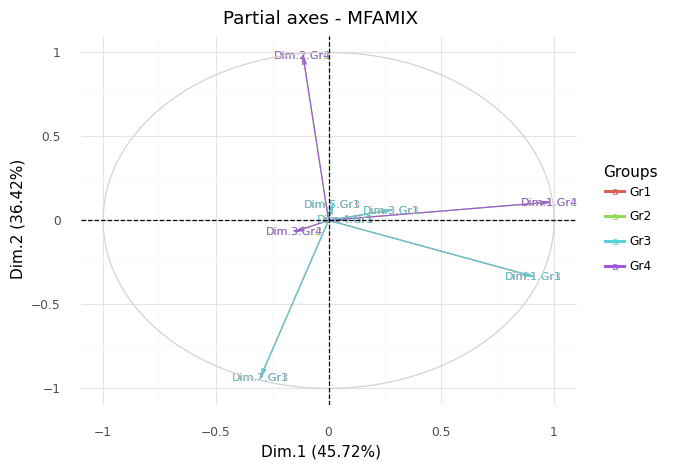

In [32]:
from scientisttools import fviz_mfa_axes
p = fviz_mfa_axes(res_mfamix)
print(p)

## Plot contrib

In [33]:
from scientisttools import MFAMIX
res_mfamix2 = MFAMIX(n_components=None,group=[3,3,3,3],group_type=["n","s","n","s"],parallelize=True) #
# Instanciation
res_mfamix2.fit(Biometrie2)

MFAMIX(group=[3, 3, 3, 3], group_type=['n', 's', 'n', 's'], n_components=None,
       parallelize=True)

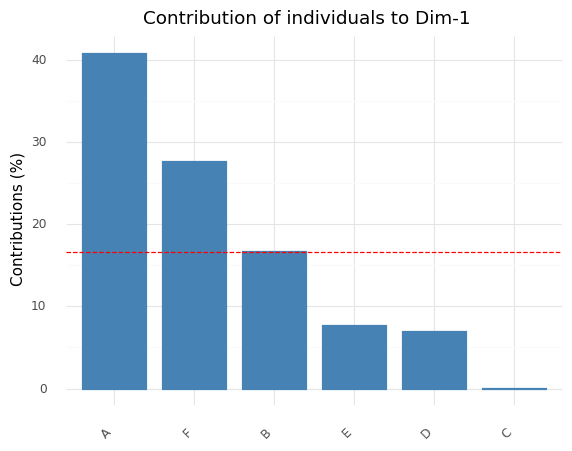

In [34]:
from scientisttools import fviz_contrib
p = fviz_contrib(res_mfamix2,choice="ind")
print(p)

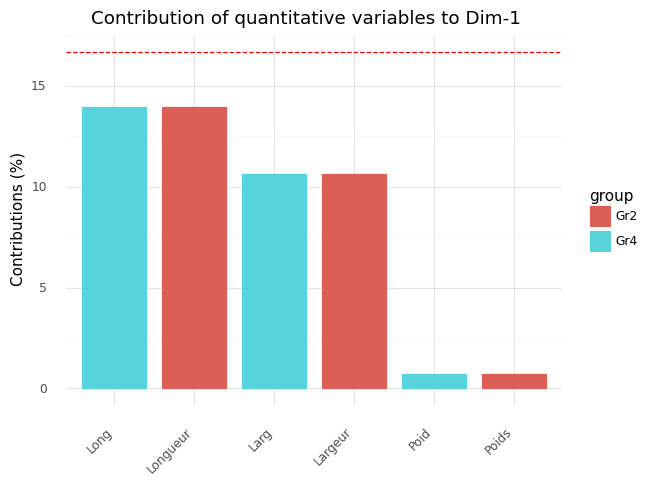

In [35]:
p = fviz_contrib(res_mfamix2,choice="quanti_var")
print(p)

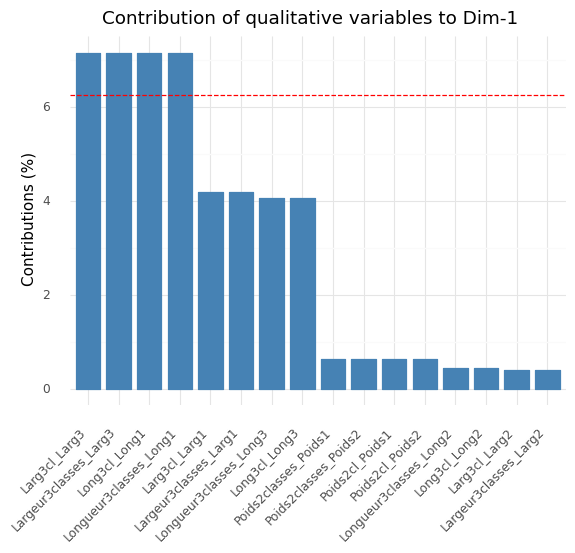

In [36]:
p = fviz_contrib(res_mfamix2,choice="quali_var")
print(p)

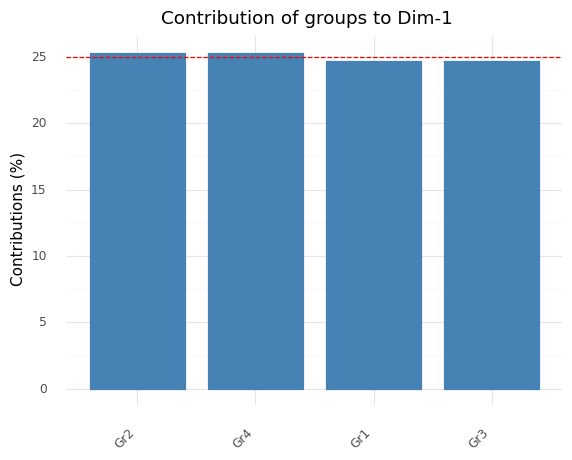

In [37]:
p = fviz_contrib(res_mfamix2,choice="group")
print(p)

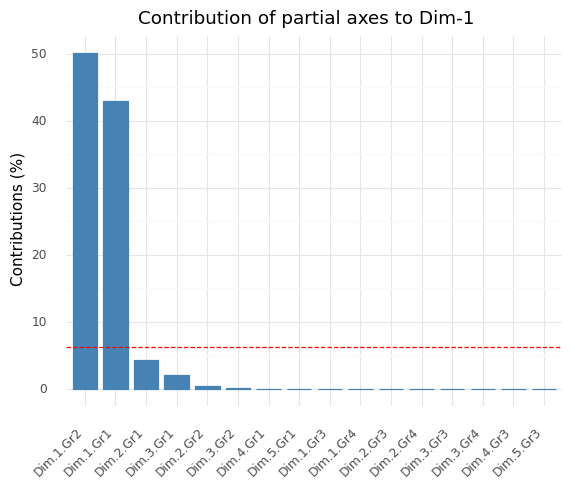

In [38]:
p = fviz_contrib(res_mfamix,choice="partial_axes")
print(p)

## Plot cos2

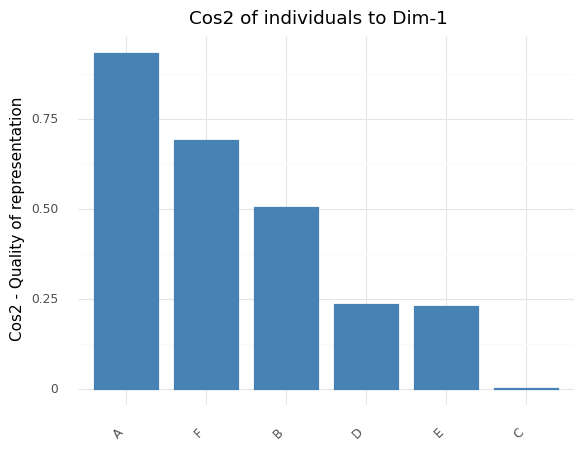

In [39]:
from scientisttools import fviz_cos2
p = fviz_cos2(res_mfamix)
print(p)

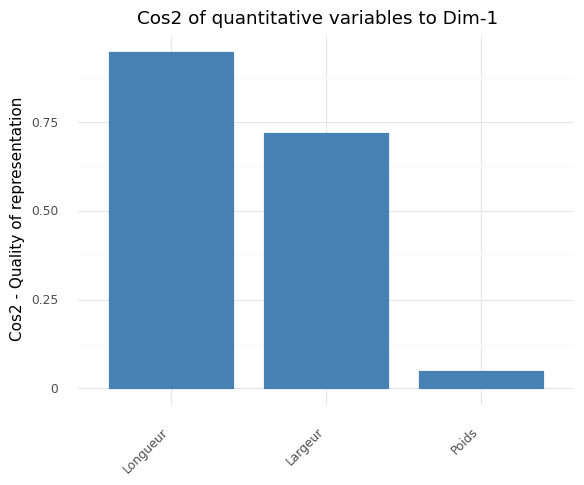

In [40]:
p = fviz_cos2(res_mfamix,choice="quanti_var")
print(p)

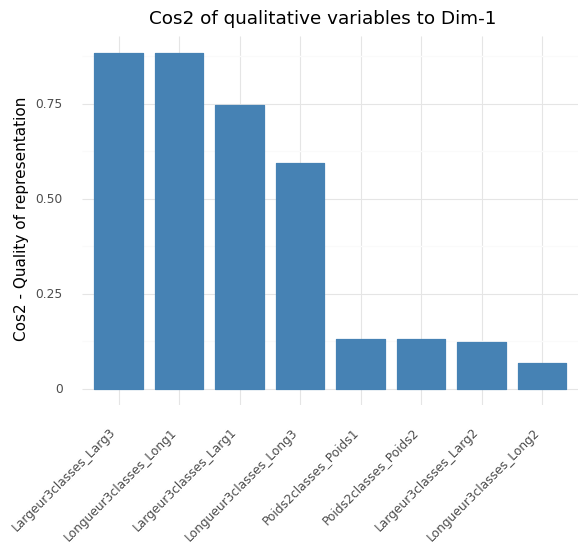

In [41]:
p = fviz_cos2(res_mfamix,choice="quali_var")
print(p)

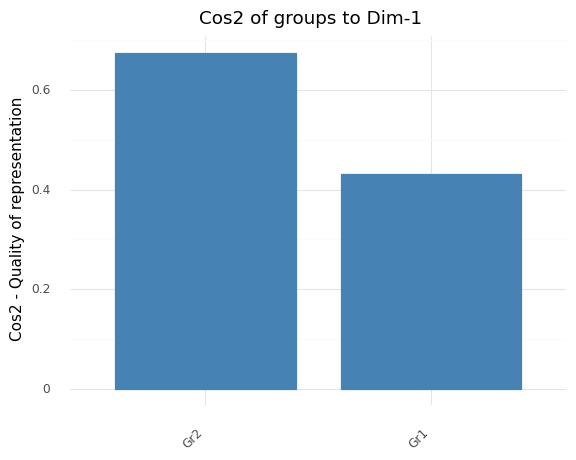

In [42]:
p = fviz_cos2(res_mfamix,choice="group")
print(p)

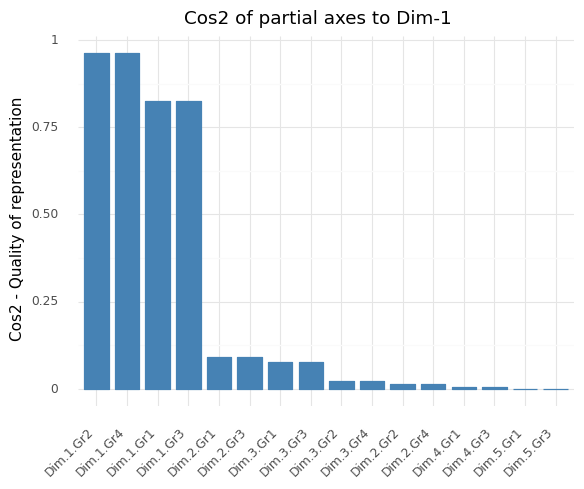

In [43]:
p = fviz_cos2(res_mfamix,choice="partial_axes")
print(p)

## Corrcircle

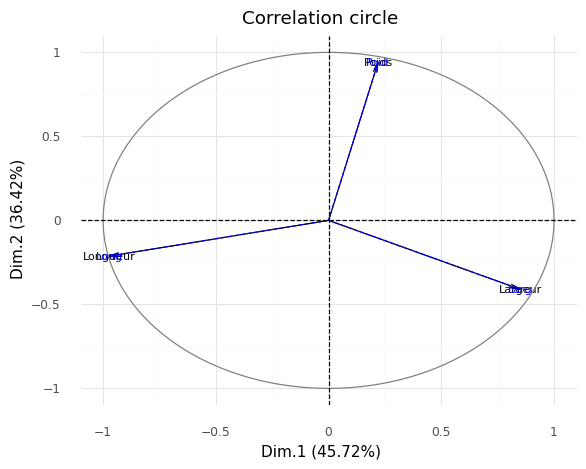

In [44]:
from scientisttools import fviz_corrcircle
p = fviz_corrcircle(res_mfamix)
print(p)